## 1. AI 작업 환경 만들기

In [6]:
# 필요 라이브러리 호출
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore, shapiro

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor

In [8]:
# 불필요 경고 메시지 무시
import warnings

warnings.filterwarnings('ignore')

In [10]:
# 폰트 설정
from matplotlib import font_manager

 # 음수 부호가 깨지는 문제 방지
plt.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정 (예: 'Malgun Gothic'은 윈도우에서 사용 가능)
# 맥일 경우 아래 코드 활성화
plt.rcParams['font.family'] = 'AppleGothic'
# 윈도우일 경우 아래 코드 활성화
#plt.rcParams['font.family'] = 'Malgum Gothic'

## 2. 데이터 획득

In [13]:
# pd.read_csv를 이용하여 데이터 저장
df = pd.read_csv('../Downloads/archive/openpowerlifting-2024-01-06-4c732975.csv')

df.head()

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,Alona Vladi,F,SBD,Raw,33.0,24-34,24-39,O,58.30,60,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
1,Galina Solovyanova,F,SBD,Raw,43.0,40-44,40-49,M1,73.10,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
2,Daniil Voronin,M,SBD,Raw,15.5,16-17,14-18,T,67.40,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
3,Aleksey Krasov,M,SBD,Raw,35.0,35-39,24-39,O,66.65,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
4,Margarita Pleschenkova,M,SBD,Raw,26.5,24-34,24-39,O,72.45,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament


In [14]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3043013 entries, 0 to 3043012
Data columns (total 41 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Name              object 
 1   Sex               object 
 2   Event             object 
 3   Equipment         object 
 4   Age               float64
 5   AgeClass          object 
 6   BirthYearClass    object 
 7   Division          object 
 8   BodyweightKg      float64
 9   WeightClassKg     object 
 10  Squat1Kg          float64
 11  Squat2Kg          float64
 12  Squat3Kg          float64
 13  Squat4Kg          float64
 14  Best3SquatKg      float64
 15  Bench1Kg          float64
 16  Bench2Kg          float64
 17  Bench3Kg          float64
 18  Bench4Kg          float64
 19  Best3BenchKg      float64
 20  Deadlift1Kg       float64
 21  Deadlift2Kg       float64
 22  Deadlift3Kg       float64
 23  Deadlift4Kg       float64
 24  Best3DeadliftKg   float64
 25  TotalKg           float64
 26  Place         

In [15]:
# 데이터 통계량 확인
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1972676.0,30.762475,13.213497,0.00,20.50,27.50,38.50,98.00
BodyweightKg,3004645.0,84.167417,22.626949,10.00,67.20,81.95,98.79,300.00
Squat1Kg,905107.0,115.332769,136.395669,-555.00,90.00,145.00,197.50,555.00
Squat2Kg,895871.0,99.527441,160.349024,-580.00,80.00,145.50,202.50,577.50
Squat3Kg,871960.0,41.023150,190.334257,-600.50,-150.00,117.50,192.50,595.00
Squat4Kg,8453.0,76.853334,179.769086,-550.00,-80.00,130.00,195.00,592.39
Best3SquatKg,2033844.0,174.451968,68.372858,-508.02,122.50,170.00,217.72,595.00
Bench1Kg,1390103.0,83.629199,97.925049,-635.50,57.50,102.50,140.00,551.00
Bench2Kg,1374485.0,57.563933,122.696310,-635.50,-28.00,95.00,140.00,521.63
Bench3Kg,1332068.0,-14.684195,138.538040,-575.00,-132.50,-57.50,117.50,635.50


In [16]:
# 결측치 개수 확인
missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 0]  # 결측치가 있는 컬럼만 표시
print("결측치가 있는 컬럼과 개수:\n", missing_values)
# 결측치가 없는 컬럼만 표시
no_missing_values = df.columns[~df.columns.isin(missing_values.index)]
print("결측치가 없는 컬럼:\n", no_missing_values)

결측치가 있는 컬럼과 개수:
 Age                 1070337
AgeClass             814256
BirthYearClass      1000666
Division               1435
BodyweightKg          38368
WeightClassKg         40757
Squat1Kg            2137906
Squat2Kg            2147142
Squat3Kg            2171053
Squat4Kg            3034560
Best3SquatKg        1009169
Bench1Kg            1652910
Bench2Kg            1668528
Bench3Kg            1710945
Bench4Kg            3022026
Best3BenchKg         358566
Deadlift1Kg         2021904
Deadlift2Kg         2039602
Deadlift3Kg         2080157
Deadlift4Kg         3020077
Best3DeadliftKg      836823
TotalKg              202421
Dots                 227397
Wilks                227397
Glossbrenner         227397
Goodlift             476889
Tested               804298
Country             1284501
State               2408023
ParentFederation    1068468
MeetState            859344
MeetTown             411193
dtype: int64
결측치가 없는 컬럼:
 Index(['Name', 'Sex', 'Event', 'Equipment', 'Place', 'Federat

## 3. 탐색적 데이터 분석(EDA)

In [18]:
# 전체 데이터 개수
total_rows = len(df)

# 결측치 비율 계산
missing_ratio = (missing_values / total_rows) * 100

# 결측치 개수와 비율을 데이터프레임으로 정리
missing_data = pd.DataFrame({'Missing Count': missing_values, 'Missing Ratio (%)': missing_ratio})
missing_data = missing_data.sort_values(by='Missing Ratio (%)', ascending=False)  # 비율 기준 정렬

# 결과 출력
print("결측치 비율 분석:")
print(missing_data)

결측치 비율 분석:
                  Missing Count  Missing Ratio (%)
Squat4Kg                3034560          99.722216
Bench4Kg                3022026          99.310322
Deadlift4Kg             3020077          99.246273
State                   2408023          79.132853
Squat3Kg                2171053          71.345505
Squat2Kg                2147142          70.559738
Squat1Kg                2137906          70.256223
Deadlift3Kg             2080157          68.358466
Deadlift2Kg             2039602          67.025741
Deadlift1Kg             2021904          66.444146
Bench3Kg                1710945          56.225360
Bench2Kg                1668528          54.831445
Bench1Kg                1652910          54.318204
Country                 1284501          42.211486
Age                     1070337          35.173593
ParentFederation        1068468          35.112173
Best3SquatKg            1009169          33.163480
BirthYearClass          1000666          32.884053
MeetState           

In [19]:
# 4차 시도 컬럼 삭제
columns_to_drop = ['Squat4Kg', 'Bench4Kg', 'Deadlift4Kg']
df.drop(columns=columns_to_drop, inplace=True)

print(f"삭제된 컬럼: {columns_to_drop}")

삭제된 컬럼: ['Squat4Kg', 'Bench4Kg', 'Deadlift4Kg']


In [20]:
# 음수값을 양수로 변환할 컬럼 리스트
cols_to_fix = ['Squat1Kg', 'Squat2Kg', 'Squat3Kg',
               'Bench1Kg', 'Bench2Kg', 'Bench3Kg',
               'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg']

# 음수값을 절댓값(양수)으로 변환
df[cols_to_fix] = df[cols_to_fix].abs()

# 변환 후 음수값이 존재하는지 확인
print((df[cols_to_fix] < 0).sum())

Squat1Kg       0
Squat2Kg       0
Squat3Kg       0
Bench1Kg       0
Bench2Kg       0
Bench3Kg       0
Deadlift1Kg    0
Deadlift2Kg    0
Deadlift3Kg    0
dtype: int64


In [21]:
# 스쿼트 시도별 결측치 보완
df['Squat2Kg'].fillna(df['Squat1Kg'], inplace=True)
df['Squat3Kg'].fillna(df['Squat2Kg'], inplace=True)

# 벤치프레스 시도별 결측치 보완
df['Bench2Kg'].fillna(df['Bench1Kg'], inplace=True)
df['Bench3Kg'].fillna(df['Bench2Kg'], inplace=True)

# 데드리프트 시도별 결측치 보완
df['Deadlift2Kg'].fillna(df['Deadlift1Kg'], inplace=True)
df['Deadlift3Kg'].fillna(df['Deadlift2Kg'], inplace=True)

In [22]:
# 최고 기록(Best3)을 1~3차 시도 중 최대값으로 일관성 유지
df['Best3SquatKg'] = df[['Squat1Kg', 'Squat2Kg', 'Squat3Kg']].max(axis=1)
df['Best3BenchKg'] = df[['Bench1Kg', 'Bench2Kg', 'Bench3Kg']].max(axis=1)
df['Best3DeadliftKg'] = df[['Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg']].max(axis=1)

In [23]:
# TotalKg를 Best3SquatKg, Best3BenchKg, Best3DeadliftKg의 합으로 다시 계산
df['TotalKg'] = df['Best3SquatKg'] + df['Best3BenchKg'] + df['Best3DeadliftKg']

# 변경된 TotalKg 확인
df[['Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg', 'TotalKg']].head()

,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg
0,90.0,60.0,107.5,257.5
1,105.0,72.5,120.0,297.5
2,100.0,65.0,105.0,270.0
3,137.5,127.5,170.0,435.0
4,90.0,60.0,125.0,275.0


In [24]:
# TotalKg가 0인 행 삭제
df = df[df['TotalKg'] > 0]

# 데이터 크기 확인
print(f"남은 데이터 개수: {len(df)}")

남은 데이터 개수: 876242


In [25]:
# 전체 데이터 개수
total_rows = len(df)

# 결측치 비율 계산
missing_values = df.isna().sum()
missing_ratio = (missing_values / total_rows) * 100

# 결측치 개수와 비율을 데이터프레임으로 정리
missing_data = pd.DataFrame({'Missing Count': missing_values, 'Missing Ratio (%)': missing_ratio})
missing_data = missing_data.sort_values(by='Missing Ratio (%)', ascending=False)  # 비율 기준 정렬

# 결과 출력
print("결측치 비율 분석:")
print(missing_data)

결측치 비율 분석:
                  Missing Count  Missing Ratio (%)
State                    542999          61.969068
MeetState                329186          37.567932
MeetTown                 227644          25.979581
Country                  218929          24.984993
Tested                   215489          24.592407
ParentFederation         129445          14.772745
Age                      102693          11.719708
BirthYearClass            94812          10.820299
AgeClass                  83881           9.572812
Goodlift                  29339           3.348276
Wilks                     28736           3.279459
Dots                      28736           3.279459
Glossbrenner              28736           3.279459
WeightClassKg              7627           0.870422
Squat1Kg                   1344           0.153382
Bench1Kg                   1227           0.140030
Deadlift1Kg                1048           0.119602
Squat2Kg                    847           0.096663
BodyweightKg        

In [26]:
# 1. 결측치 비율이 높고 분석에 불필요한 컬럼 삭제
columns_to_drop = ['State', 'MeetState', 'MeetTown', 'Country']
df.drop(columns=columns_to_drop, inplace=True)

print(f"삭제된 컬럼: {columns_to_drop}")

# 2. Tested 컬럼의 결측치를 'No'로 대체
df['Tested'].fillna('No', inplace=True)

# 3. 결측치 처리 후 검증
print(f"'Tested' 변수의 결측치 개수: {df['Tested'].isnull().sum()}")
print(f"'Tested' 변수의 값 분포:\n{df['Tested'].value_counts()}")

삭제된 컬럼: ['State', 'MeetState', 'MeetTown', 'Country']
'Tested' 변수의 결측치 개수: 0
'Tested' 변수의 값 분포:
Yes    660753
No     215489
Name: Tested, dtype: int64


In [27]:
# 최빈값으로 대체 (범주형 데이터)
for col in ['ParentFederation', 'AgeClass', 'BirthYearClass']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# 중앙값으로 대체 (연속형 데이터)
for col in ['Age']:
    df[col].fillna(df[col].median(), inplace=True)

# 특정 컬럼의 결측치 개수 확인
columns_to_check = ['ParentFederation', 'AgeClass', 'BirthYearClass', 'Age']
# 결측치 개수 출력
print(df[columns_to_check].isnull().sum())

ParentFederation    0
AgeClass            0
BirthYearClass      0
Age                 0
dtype: int64


In [28]:
# 평균으로 대체 (연속형 데이터)
for col in ['Goodlift', 'Wilks', 'Dots', 'Glossbrenner', 'BodyweightKg']:
    df[col].fillna(df[col].mean(), inplace=True)

# 최빈값으로 대체 (범주형 데이터)
df['WeightClassKg'].fillna(df['WeightClassKg'].mode()[0], inplace=True)
df['Division'].fillna(df['Division'].mode()[0], inplace=True)

# 특정 컬럼의 결측치 개수 확인
columns_to_check = ['Goodlift', 'Wilks', 'Dots', 'Glossbrenner', 'BodyweightKg', 'WeightClassKg', 'Division']
# 결측치 개수 출력
print(df[columns_to_check].isnull().sum())

Goodlift         0
Wilks            0
Dots             0
Glossbrenner     0
BodyweightKg     0
WeightClassKg    0
Division         0
dtype: int64


In [29]:
# 전체 데이터 개수
total_rows = len(df)

# 결측치 비율 계산
missing_values = df.isna().sum()
missing_ratio = (missing_values / total_rows) * 100

# 결측치 개수와 비율을 데이터프레임으로 정리
missing_data = pd.DataFrame({'Missing Count': missing_values, 'Missing Ratio (%)': missing_ratio})
missing_data = missing_data.sort_values(by='Missing Ratio (%)', ascending=False)  # 비율 기준 정렬

# 결과 출력
print("결측치 비율 분석:")
print(missing_data)

결측치 비율 분석:
                  Missing Count  Missing Ratio (%)
Squat1Kg                   1344           0.153382
Bench1Kg                   1227           0.140030
Deadlift1Kg                1048           0.119602
Squat2Kg                    847           0.096663
Bench2Kg                    790           0.090158
Deadlift2Kg                 734           0.083767
Tested                        0           0.000000
Goodlift                      0           0.000000
Glossbrenner                  0           0.000000
Wilks                         0           0.000000
Deadlift3Kg                   0           0.000000
Federation                    0           0.000000
Dots                          0           0.000000
Place                         0           0.000000
ParentFederation              0           0.000000
Date                          0           0.000000
TotalKg                       0           0.000000
Best3DeadliftKg               0           0.000000
MeetCountry         

In [30]:
columns_to_check = ['Squat1Kg', 'Bench1Kg', 'Deadlift1Kg', 
                    'Squat2Kg', 'Bench2Kg', 'Deadlift2Kg']

# 체급과 성별 기준으로 중앙값 대체
for col in columns_to_check:
    df[col] = df.groupby(['WeightClassKg', 'Sex'])[col].transform(lambda x: x.fillna(x.median()))

# 처리 후 결측치 재확인
print("결측치 처리 후 확인:")
print(df[columns_to_check].isnull().sum())

결측치 처리 후 확인:
Squat1Kg       0
Bench1Kg       0
Deadlift1Kg    0
Squat2Kg       0
Bench2Kg       0
Deadlift2Kg    0
dtype: int64


In [31]:
# 연속형 변수(수치형 변수) 목록 자동 추출
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 이상치 탐색 대상에서 불필요한 변수 제외 
exclude_columns = ['Age'] 
outlier_columns = [col for col in numeric_columns if col not in exclude_columns]

# 이상치 탐색 대상 컬럼 확인
print("이상치 탐색 대상 컬럼 목록:")
print(outlier_columns)

이상치 탐색 대상 컬럼 목록:
['BodyweightKg', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Best3SquatKg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Best3BenchKg', 'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Best3DeadliftKg', 'TotalKg', 'Dots', 'Wilks', 'Glossbrenner', 'Goodlift']


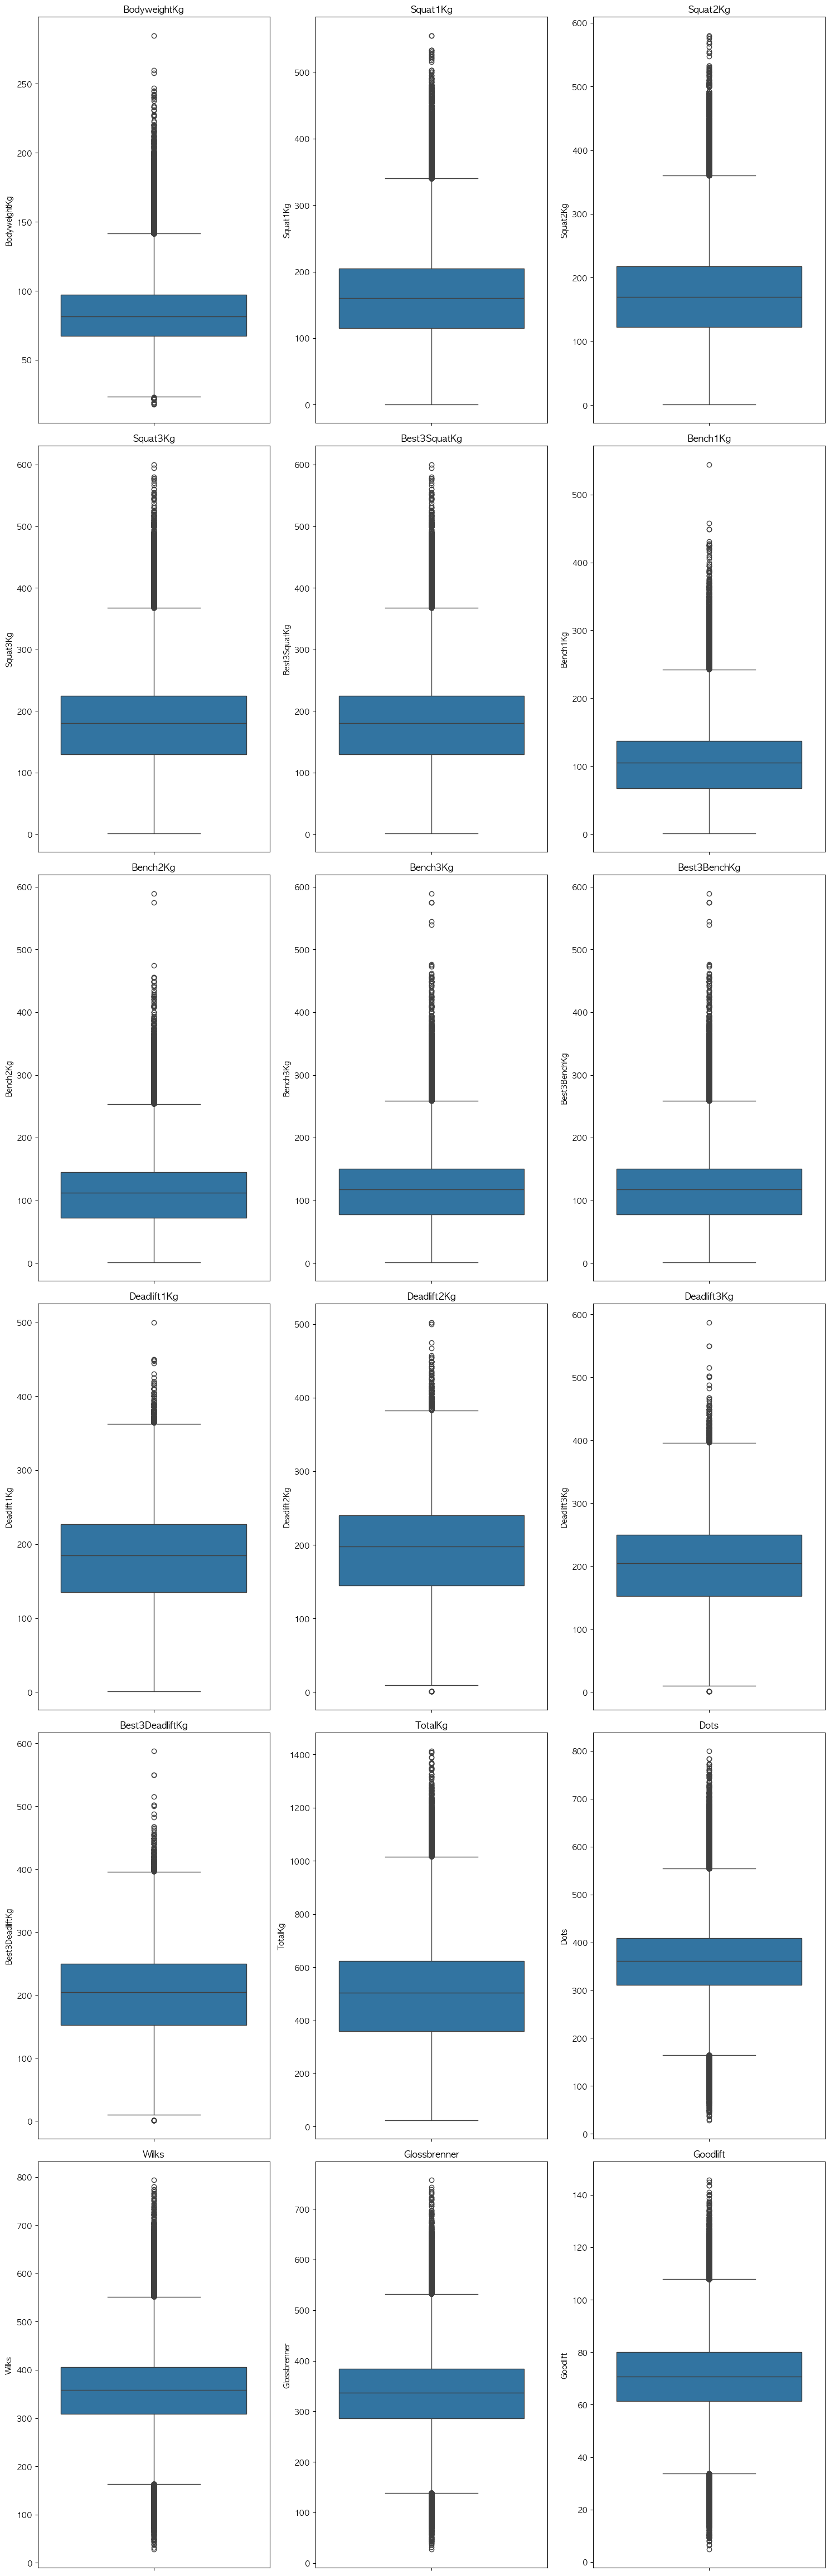

In [32]:
# 박스플롯 시각화
plt.figure(figsize=(15, len(outlier_columns) * 3))

for i, col in enumerate(outlier_columns, 1):
    plt.subplot(len(outlier_columns) // 3 + 1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


In [33]:
# Z-Score 계산
for col in outlier_columns:
    df[f'{col}_Z'] = zscore(df[col])

# Z-Score 절대값이 3보다 큰 경우 이상치로 간주하여 제거
for col in outlier_columns:
    df = df[df[f'{col}_Z'].abs() <= 3]

# 불필요한 Z-Score 컬럼 삭제
z_columns = [f'{col}_Z' for col in outlier_columns]
df.drop(columns=z_columns, inplace=True)

# 이상치 제거 후 데이터 크기 확인
print(f"이상치 제거 후 데이터 개수: {len(df)}")


이상치 제거 후 데이터 개수: 855092


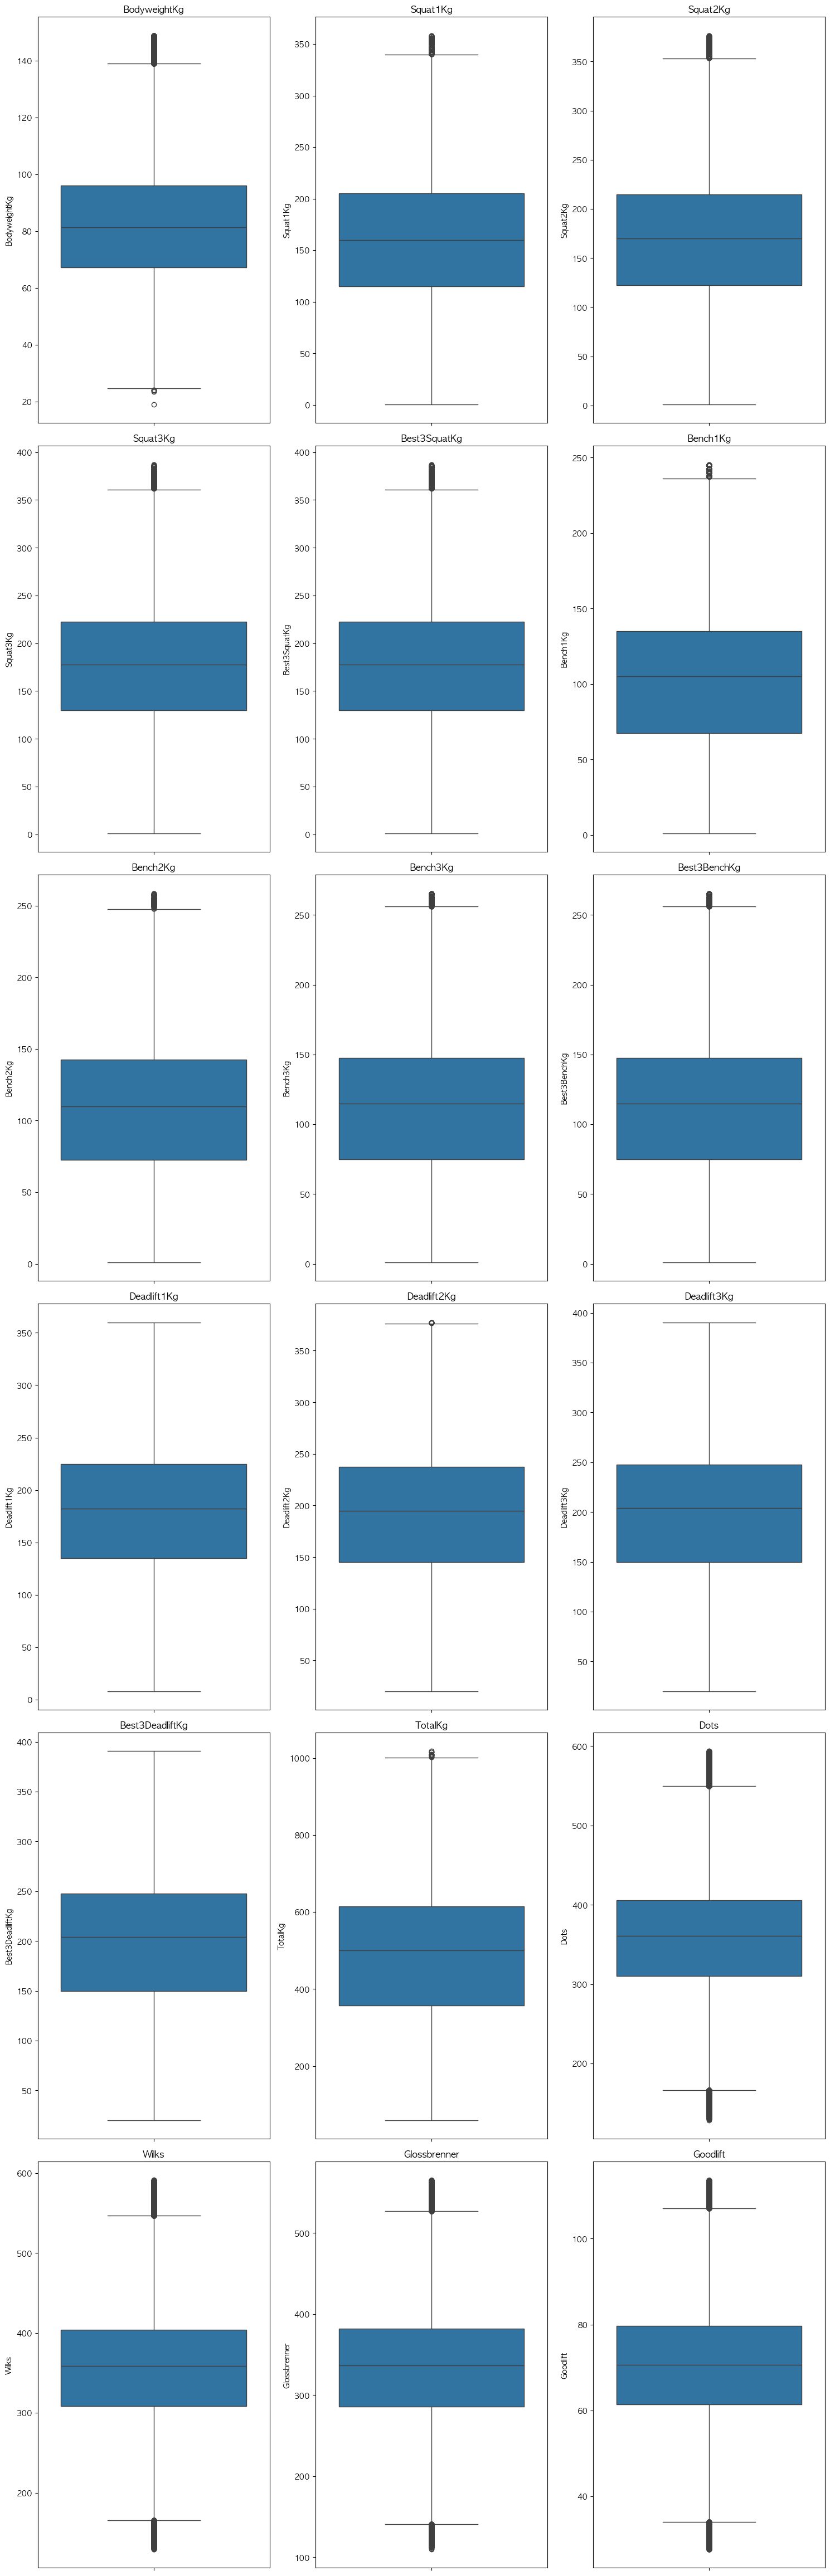

In [34]:
# 이상치 제거 후 박스플롯 확인
plt.figure(figsize=(15, len(outlier_columns) * 3))

for i, col in enumerate(outlier_columns, 1):
    plt.subplot(len(outlier_columns) // 3 + 1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


In [35]:
# 삭제할 컬럼 목록
columns_to_drop = ['Name', 'Event', 'Federation', 'MeetCountry', 'MeetName', 'Date']

# 데이터에서 컬럼 삭제
df.drop(columns=columns_to_drop, inplace=True)

# 삭제된 변수 확인
print(f"삭제된 변수 목록: {columns_to_drop}")

삭제된 변수 목록: ['Name', 'Event', 'Federation', 'MeetCountry', 'MeetName', 'Date']


## 4. 데이터 변환 및 스케일링

### 범주형 변수 인코딩

In [38]:
# Label Encoding을 적용할 범주형 변수 목록
label_columns = ['Sex', 'Equipment', 'AgeClass', 'BirthYearClass', 
                 'Division', 'WeightClassKg', 'Tested', 'ParentFederation']

# Label Encoding 수행
label_encoders = {}  # 변환기 저장용
for col in label_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le  # 변환 객체 저장
    print(f"Label Encoding 적용: {col} (변환값: {le.classes_})")

# 변환된 데이터 확인
df.head()

Label Encoding 적용: Sex (변환값: ['F' 'M' 'Mx'])
Label Encoding 적용: Equipment (변환값: ['Multi-ply' 'Raw' 'Single-ply' 'Straps' 'Unlimited' 'Wraps'])
Label Encoding 적용: AgeClass (변환값: ['13-15' '16-17' '18-19' '20-23' '24-34' '35-39' '40-44' '45-49' '5-12'
 '50-54' '55-59' '60-64' '65-69' '70-74' '75-79' '80-999'])
Label Encoding 적용: BirthYearClass (변환값: ['14-18' '19-23' '24-39' '40-49' '50-59' '60-69' '70-999'])
Label Encoding 적용: Division (변환값: ['13-14' '13-19' '14-15' ... 'Младшие девушки (14-16)' 'Юниорки' 'Юноши'])
Label Encoding 적용: WeightClassKg (변환값: ['+' '100' '100+' '101.8' '102' '102+' '102.5' '104.7' '104.7+' '105'
 '105+' '109' '109.7' '110' '110+' '111.8' '113.5' '113.5+' '118' '120'
 '120+' '120.2' '120.2+' '124.7' '124.7+' '125' '125+' '125.1' '126.8'
 '140' '140+' '141.8' '145' '145+' '155' '30' '31' '33' '35' '36' '38'
 '39' '40' '43' '44' '44.5' '46' '47' '47.5' '47.6' '48' '49' '50.5'
 '51.7' '52' '52+' '52.5' '53' '53.8' '54.4' '54.8' '55' '55.5' '55.7'
 '56' '56+' '57' '5

,Sex,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,...,Deadlift3Kg,Best3DeadliftKg,TotalKg,Place,Dots,Wilks,Glossbrenner,Goodlift,Tested,ParentFederation
0,0,1,33.0,4,2,2453,58.30,73,75.0,80.0,...,107.5,107.5,257.5,1,279.44,282.18,249.42,57.10,1,3
1,0,1,43.0,6,3,1452,73.10,103,95.0,100.0,...,120.0,120.0,297.5,1,278.95,272.99,240.35,56.76,1,3
2,1,1,15.5,1,0,2701,67.40,103,85.0,90.0,...,105.0,105.0,270.0,1,206.40,206.49,200.45,41.24,1,3
3,1,1,35.0,5,2,2453,66.65,103,125.0,132.0,...,170.0,170.0,435.0,1,334.49,334.94,325.32,66.68,1,3
4,1,1,26.5,4,2,2453,72.45,103,80.0,85.0,...,125.0,125.0,275.0,1,194.46,193.55,187.29,39.34,1,3


In [39]:
df.columns

Index(['Sex', 'Equipment', 'Age', 'AgeClass', 'BirthYearClass', 'Division',
       'BodyweightKg', 'WeightClassKg', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg',
       'Best3SquatKg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Best3BenchKg',
       'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Best3DeadliftKg',
       'TotalKg', 'Place', 'Dots', 'Wilks', 'Glossbrenner', 'Goodlift',
       'Tested', 'ParentFederation'],
      dtype='object')

### 연속형 변수 스케일링

In [41]:
# 연속형 변수 리스트 (인코딩된 범주형 변수 제외)
continuous_vars = [
    'BodyweightKg', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Best3SquatKg',
    'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Best3BenchKg',
    'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Best3DeadliftKg',
    'Dots', 'Wilks', 'Glossbrenner', 'Goodlift'
]

# 정규성 검정 (Shapiro-Wilk 테스트)
normality_results = {}
for col in continuous_vars:
    stat, p_value = shapiro(df[col].dropna())  # 결측치 제외 후 검정
    normality_results[col] = p_value

# 정규성을 만족하는 변수와 만족하지 않는 변수 분류
normal_dist_vars = [col for col, p in normality_results.items() if p > 0.05]  # p > 0.05: 정규성 만족
non_normal_dist_vars = [col for col, p in normality_results.items() if p <= 0.05]  # p <= 0.05: 정규성 불만족

# 결과 출력
normal_dist_vars, non_normal_dist_vars

([],
 ['BodyweightKg',
  'Squat1Kg',
  'Squat2Kg',
  'Squat3Kg',
  'Best3SquatKg',
  'Bench1Kg',
  'Bench2Kg',
  'Bench3Kg',
  'Best3BenchKg',
  'Deadlift1Kg',
  'Deadlift2Kg',
  'Deadlift3Kg',
  'Best3DeadliftKg',
  'Dots',
  'Wilks',
  'Glossbrenner',
  'Goodlift'])

In [42]:
# RobustScaler 적용
scaler = RobustScaler()
df[continuous_vars] = scaler.fit_transform(df[non_normal_dist_vars])

# 변환된 데이터 확인
df.head()

,Sex,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,...,Deadlift3Kg,Best3DeadliftKg,TotalKg,Place,Dots,Wilks,Glossbrenner,Goodlift,Tested,ParentFederation
0,0,1,33.0,4,2,2453,-0.804878,73,-0.944444,-0.972973,...,-0.990974,-0.990974,257.5,1,-0.850115,-0.802981,-0.905660,-0.741191,1,3
1,0,1,43.0,6,3,1452,-0.289199,103,-0.722222,-0.756757,...,-0.862769,-0.862769,297.5,1,-0.855233,-0.899444,-0.999620,-0.759811,1,3
2,1,1,15.5,1,0,2701,-0.487805,103,-0.833333,-0.864865,...,-1.016615,-1.016615,270.0,1,-1.613014,-1.597460,-1.412963,-1.609756,1,3
3,1,1,35.0,5,2,2453,-0.513937,103,-0.388889,-0.410811,...,-0.349949,-0.349949,435.0,1,-0.275120,-0.249187,-0.119376,-0.216547,1,3
4,1,1,26.5,4,2,2453,-0.311847,103,-0.888889,-0.918919,...,-0.811487,-0.811487,275.0,1,-1.737727,-1.733284,-1.549294,-1.713809,1,3


In [43]:
# 데이터 정보 확인
df.info()

# Place 유니크 값 확인
print(df['Place'].unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855092 entries, 0 to 3043012
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Sex               855092 non-null  int64  
 1   Equipment         855092 non-null  int64  
 2   Age               855092 non-null  float64
 3   AgeClass          855092 non-null  int64  
 4   BirthYearClass    855092 non-null  int64  
 5   Division          855092 non-null  int64  
 6   BodyweightKg      855092 non-null  float64
 7   WeightClassKg     855092 non-null  int64  
 8   Squat1Kg          855092 non-null  float64
 9   Squat2Kg          855092 non-null  float64
 10  Squat3Kg          855092 non-null  float64
 11  Best3SquatKg      855092 non-null  float64
 12  Bench1Kg          855092 non-null  float64
 13  Bench2Kg          855092 non-null  float64
 14  Bench3Kg          855092 non-null  float64
 15  Best3BenchKg      855092 non-null  float64
 16  Deadlift1Kg       8

In [44]:
# 'Place' 열에서 숫자가 아닌 값을 -1로 변환
df['Place'] = df['Place'].apply(lambda x: int(x) if str(x).isnumeric() else -1)

# 변환 후 데이터 확인
print(df['Place'].unique())  # 변환된 값 확인
print(f"변환 후 데이터 크기: {df.shape}")

[  1   2   3   4  -1   5   6   7   8   9  10  11  12  13  14  18  15  16
  17  19  20  21  22  23  24  34  25  31  28  33  27  35  26  36  30  32
  29  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120]
변환 후 데이터 크기: (855092, 28)


## 5. 상관관계 분석

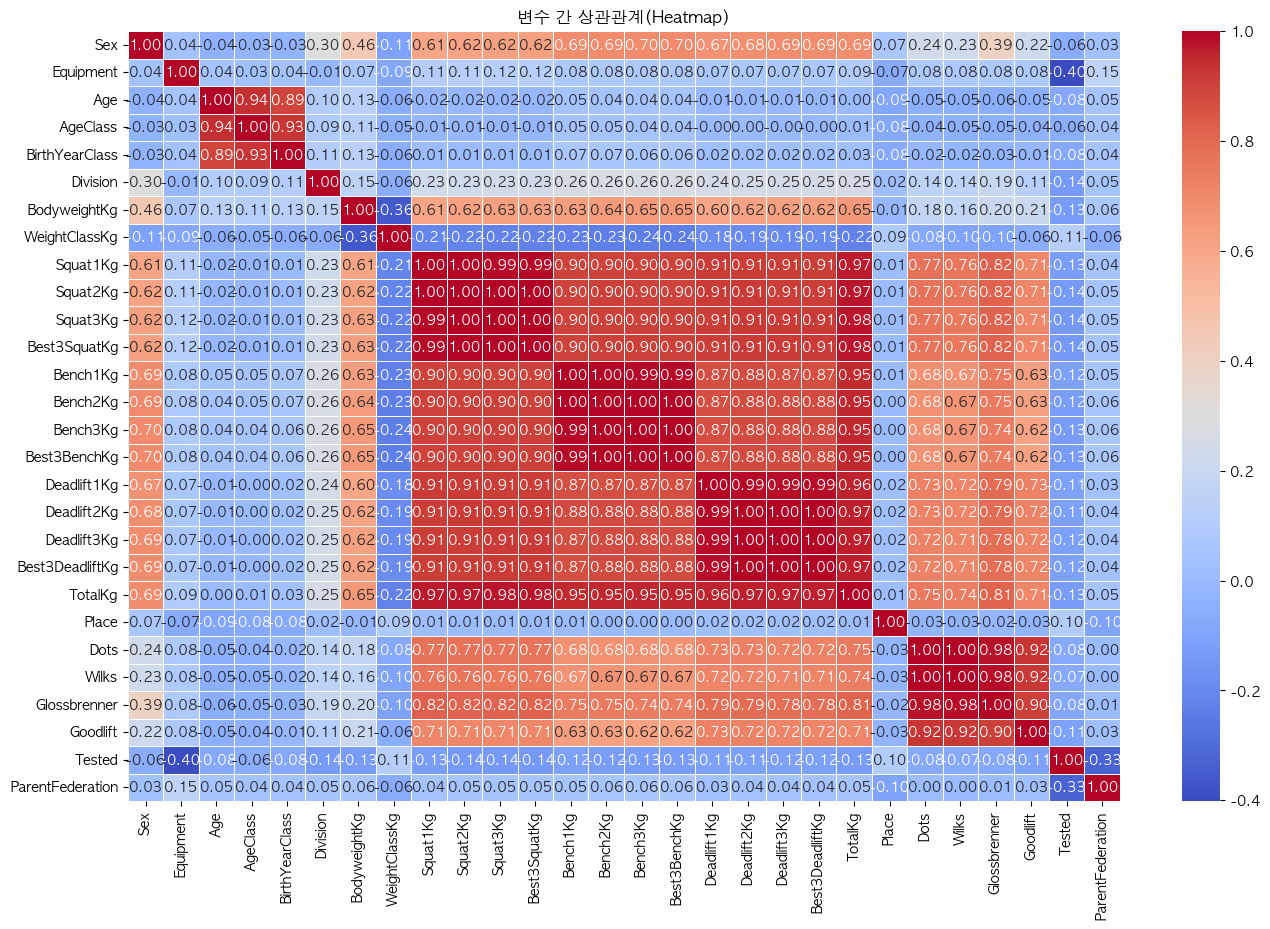

In [46]:
# 상관 행렬 계산
corr_matrix = df.corr()

# 상관 행렬 시각화 (Heatmap)
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("변수 간 상관관계(Heatmap)")
plt.show()

In [47]:
# 제거할 변수 목록
columns_to_drop = [
    'Squat1Kg', 'Squat2Kg', 'Squat3Kg',  # 스쿼트 시도 제거
    'Bench1Kg', 'Bench2Kg', 'Bench3Kg',  # 벤치프레스 시도 제거
    'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg',  # 데드리프트 시도 제거
    'Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg', #각 베스트 시도 제거
    'Age', 'AgeClass', 'BirthYearClass',  # TotalKg과 상관관계가 낮은 변수 제거
    'ParentFederation', 'Equipment', 'Place'  # 분석에 불필요한 변수 제거
]

# 데이터프레임에서 해당 변수 제거
df.drop(columns=columns_to_drop, inplace=True)

# 데이터 확인
df.head()

,Sex,Division,BodyweightKg,WeightClassKg,TotalKg,Dots,Wilks,Glossbrenner,Goodlift,Tested
0,0,2453,-0.804878,73,257.5,-0.850115,-0.802981,-0.905660,-0.741191,1
1,0,1452,-0.289199,103,297.5,-0.855233,-0.899444,-0.999620,-0.759811,1
2,1,2701,-0.487805,103,270.0,-1.613014,-1.597460,-1.412963,-1.609756,1
3,1,2453,-0.513937,103,435.0,-0.275120,-0.249187,-0.119376,-0.216547,1
4,1,2453,-0.311847,103,275.0,-1.737727,-1.733284,-1.549294,-1.713809,1


## 6. 데이터 분할

In [49]:
# 독립 변수(X)와 종속 변수(y) 설정
X = df.drop(columns=['TotalKg'])  # 독립 변수 (입력 데이터)
y = df['TotalKg']  # 종속 변수 (목표 변수)

# 학습 데이터(80%)와 테스트 데이터(20%) 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 크기 확인
print(f"학습 데이터 크기: {X_train.shape}, 테스트 데이터 크기: {X_test.shape}")

학습 데이터 크기: (684073, 9), 테스트 데이터 크기: (171019, 9)


## 7. 모델링 및 평가

In [51]:
# 모델 평가 함수
def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f" {model_name} 평가 결과")
    print(f"  - MAE (Mean Absolute Error): {mae:.2f}")
    print(f"  - MSE (Mean Squared Error): {mse:.2f}")
    print(f"  - R² Score: {r2:.4f}")
    
    return {"Model": model_name, "MAE": mae, "MSE": mse, "R² Score": r2}

### 선형 회귀

In [53]:
# 선형 회귀 모델 학습
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 모델 평가
lr_results = evaluate_model(lr_model, X_test, y_test, model_name="Linear Regression")

 Linear Regression 평가 결과
  - MAE (Mean Absolute Error): 20.65
  - MSE (Mean Squared Error): 1087.35
  - R² Score: 0.9601


### LightGBM

In [56]:
# LightGBM 모델 정의
lgbm_model = LGBMRegressor(n_estimators=100, random_state=42)

# 모델 학습
lgbm_model.fit(X_train, y_train)

# 모델 평가
lgbm_results = evaluate_model(lgbm_model, X_test, y_test, model_name="LightGBM")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002607 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1634
[LightGBM] [Info] Number of data points in the train set: 684073, number of used features: 9
[LightGBM] [Info] Start training from score 496.836976
 LightGBM 평가 결과
  - MAE (Mean Absolute Error): 10.67
  - MSE (Mean Squared Error): 459.18
  - R² Score: 0.9831


### RandomForest Rgressor

In [59]:
# RandomForest Rgressor모델 정의
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 모델 학습
rf_model.fit(X_train, y_train)

# 모델 평가
evaluate_model(rf_model, X_test, y_test, model_name="Random Forest")

 Random Forest 평가 결과
  - MAE (Mean Absolute Error): 10.90
  - MSE (Mean Squared Error): 510.28
  - R² Score: 0.9813


{'Model': 'Random Forest',
 'MAE': 10.896291616224142,
 'MSE': 510.2784625532237,
 'R² Score': 0.9812666014089155}

### 딥러닝

In [61]:
#필요 라이브러리 불러오기
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import random

In [62]:
#모델 시드 고정
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

In [63]:
# 신경망 모델 생성
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # 입력층 + 첫 번째 은닉층
    Dropout(0.2),  # 20% 뉴런 비활성화 (과적합 방지)
    Dense(32, activation='relu'),  # 두 번째 은닉층
    Dropout(0.2),  
    Dense(16, activation='relu'),  # 세 번째 은닉층
    Dense(1, activation='linear')  # 출력층 (회귀 모델이므로 활성화 함수 없음)
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,265 (12.75 KB)

 Trainable params: 3,265 (12.75 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
# 모델 컴파일 (MSE 손실 함수, Adam 최적화)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

In [65]:
# EarlyStopping 설정 (과적합 방지)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
# 모델 학습
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=100, batch_size=32, verbose=1, callbacks=[early_stopping])

Epoch 1/100
21378/21378 ━━━━━━━━━━━━━━━━━━━━ 8s 360us/step - loss: 16768.5273 - mae: 87.5509 - val_loss: 17229.5254 - val_mae: 121.6700
Epoch 2/100
21378/21378 ━━━━━━━━━━━━━━━━━━━━ 8s 358us/step - loss: 1675.8636 - mae: 28.1983 - val_loss: 13634.7236 - val_mae: 102.2433
Epoch 3/100
21378/21378 ━━━━━━━━━━━━━━━━━━━━ 8s 361us/step - loss: 1317.2944 - mae: 24.0416 - val_loss: 14028.5156 - val_mae: 102.9485
Epoch 4/100
21378/21378 ━━━━━━━━━━━━━━━━━━━━ 8s 361us/step - loss: 1184.1268 - mae: 22.2785 - val_loss: 13612.0586 - val_mae: 101.1345
Epoch 5/100
21378/21378 ━━━━━━━━━━━━━━━━━━━━ 8s 359us/step - loss: 1119.1652 - mae: 21.3507 - val_loss: 10546.3037 - val_mae: 87.4339
Epoch 6/100
21378/21378 ━━━━━━━━━━━━━━━━━━━━ 8s 359us/step - loss: 1068.7456 - mae: 20.5692 - val_loss: 10999.6357 - val_mae: 87.6996
Epoch 7/100
21378/21378 ━━━━━━━━━━━━━━━━━━━━ 8s 358us/step - loss: 1007.7551 - mae: 19.6544 - val_loss: 10570.0322 - val_mae: 86.2162
Epoch 8/100
21378/21378 ━━━━━━━━━━━━━━━━━━━━ 8s 360us/ste

In [ ]:
# 모델 예측 및 평가
evaluate_model(model, X_test, y_test, model_name="Deep Learning")